# Deep Learning
## Actividad 1: Deep Vision

GRUPO 7

Alina Oganesyan  
Celia Vincent  
Orlando Dotollo  

# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el ejercicio presente una profunda experimentación haciendo uso todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal que se debe diseñar, entrenar y optimizar. Se requiere una justificación empírica de las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el ejercicio presente una profunda experimentación haciendo uso de todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso seguido (carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- Poner el nombre del grupo en el nombre del archivo y el nombre de todos los integrantes del grupo al inicio del notebook.
- Las redes utilizadas deben estar entrenadas y con las métricas extraídas en el conjunto de test.
- Es recomendable crear una última sección de texto en el notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

Recomendaciones en el Uso de Colab:

- Eliminar las variables innecesarias para liberar RAM mediante la sentencia:

del nombrevariable

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/' # Ajustar el directorio raíz de Google Drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer


In [2]:
print(tf.__version__)

2.15.0


In [3]:
# Carga de datos
print("[INFO]: Loading CIFAR-100 data...")
cifar100 = tf.keras.datasets.cifar100
((x_train, y_train), (x_test, y_test)) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


[INFO]: Loading CIFAR-100 data...
169001437/169001437 [==============================] - 18s 0us/step


In [4]:
# Imprimir las formas de los datos para verificar
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### **Estrategia 1: Red pre-entrenada**

###**Red 1: VGG16**

Como primera red pre-entrenada, elegimos VGG16 por considerarse simple y usar capas convolucionales estándar. Igualmente, aunque la arquitectura sea simple, parece ser pesada, por sus requerimientos de memoria (528MB según la documentación de Keras).

**Acondicionamos los datos de entrenamiento**

Imprimimos los valores mínimos y máximos antes de realizar cualquier cambio para tener una referencia de cómo cambiarán los datos tras el procesamiento

In [5]:
print(x_train.max())
print(x_train.min())


255
0


Realizamos OHE sobre las etiquetas de test y train.

In [7]:
print("Forma de y_train antes de la conversión:", y_train.shape)
print("Forma de y_test antes de la conversión:", y_test.shape)

Forma de y_train antes de la conversión: (50000, 1)
Forma de y_test antes de la conversión: (10000, 1)


In [8]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [9]:
print("Forma de y_train después de la conversión 1:", y_train.shape)
print("Forma de y_test después de la conversión 1:", y_test.shape)

Forma de y_train después de la conversión 1: (50000, 100)
Forma de y_test después de la conversión 1: (10000, 100)


Importamos la arquitectura VGG16 y aplicamos el preprocesamiento  necesario específicamente para esta red neuronal.

In [10]:
from tensorflow.keras.applications import vgg16
x_train = vgg16.preprocess_input(x_train)
x_test = vgg16.preprocess_input(x_test)


Comprobamos cómo han cambiado los datos tras el procesamiento.

In [11]:
print(x_train.max())
print(x_train.min())

151.061
-123.68


**Cargamos el base model**

In [12]:
base_model = vgg16.VGG16(weights='imagenet',
                 include_top=False, # No incluir el Top Model (parte destinada a la clasificación)
                 input_shape=(32,32,3))
base_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

#### **Transfer Learning**

**Congelando el modelo base y creando el top model**

Primero importamos las clases necesarios y congelamos el base model, es decir, hacemos que sus pesos no se actualicen durante el entrenamiento

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

base_model.trainable = False

Creamos un nuevo modelo secuencial y lo conectamos con nuestro base model

In [14]:
pre_trained_model = Sequential()
pre_trained_model.add(base_model)

Ahora, añadimos más capas al nuevo modelo y observamos el resumen de nuestro "top model"

In [15]:
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
Total params: 14871716 (56.73 MB)
Trainable params: 157028 (613.39 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


**Entrenando el top model**

In [16]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 9s 25ms/step - loss: 0.0600 - accuracy: 0.9855 - val_loss: 10.3922 - val_accuracy: 0.3165
Epoch 2/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0615 - accuracy: 0.9837 - val_loss: 10.6165 - val_accuracy: 0.3164
Epoch 3/20
313/313 [==============================] - 6s 21ms/step - loss: 0.0524 - accuracy: 0.9880 - val_loss: 10.7231 - val_accuracy: 0.3167
Epoch 4/20
313/313 [==============================] - 7s 21ms/step - loss: 0.0370 - accuracy: 0.9926 - val_loss: 10.8309 - val_accuracy: 0.3191
Epoch 5/20
313/313 [==============================] - 7s 22ms/step - loss: 0.0265 - accuracy: 0.9957 - val_loss: 10.7981 - val_accuracy: 0.3179
Epoch 6/20
313/313 [==============================] - 7s 23ms/step - loss: 0.0204 - accuracy: 0.9968 - val_loss: 10.8917 - val_accuracy: 0.3214
Epoch 7/20
313/313 [==============================] - 6s 20ms/step - loss: 

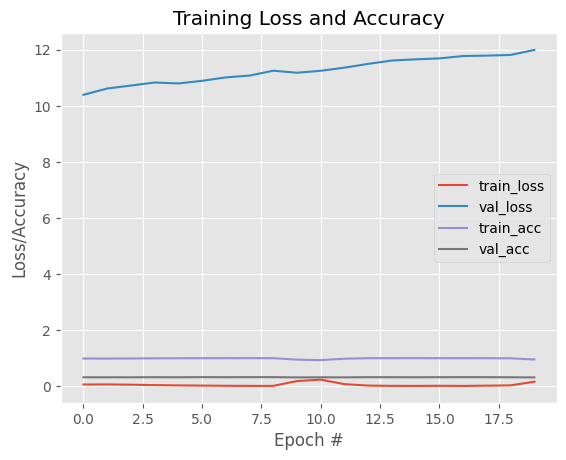

In [20]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0005), metrics=["accuracy"])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = pre_trained_model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

# Montamos la unidad de Drive
drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras
pre_trained_model.save("/content/sample_data/deepCNN_CIFAR10_pretrained.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model.predict(x_test, batch_size=128)

# Sacamos el report para test
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

#### **Fine Tuning**


###**Red 2: MobileNet**


Como segunda red pre-entrenada, elegimos MobileNet por tener una arquitectura muy distinta a la de VGG16, y considerarse un modelo más eficiente (cosa que también comprobamos al mirar sus requerimientos de memoria que en la documentación de Keras son 16MB)

### **Estrategia 2: Entrenar desde cero o from scratch**